In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_gbnsr6.pkl', 'rb')     
gbnsr6 = pickle.load(dbfile)
dbfile.close()
gbfile = open('gb.pkl', 'rb')
gb = pickle.load(gbfile)
gbfile.close()
mmpbsafile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmpbsa.pkl', 'rb')
mmpbsa = pickle.load(mmpbsafile)
mmpbsafile.close()

In [13]:
removing_indices = ['EKtot', 'EPtot', 'meta']
gbnsr6_clean = []
for g in gbnsr6:
    new_g = {}
    for k in g.keys():
        if any([k.__contains__(r) for r in removing_indices]):
            continue
        new_g[k] = g[k]
    gbnsr6_clean.append(new_g)
gbnsr6 = gbnsr6_clean

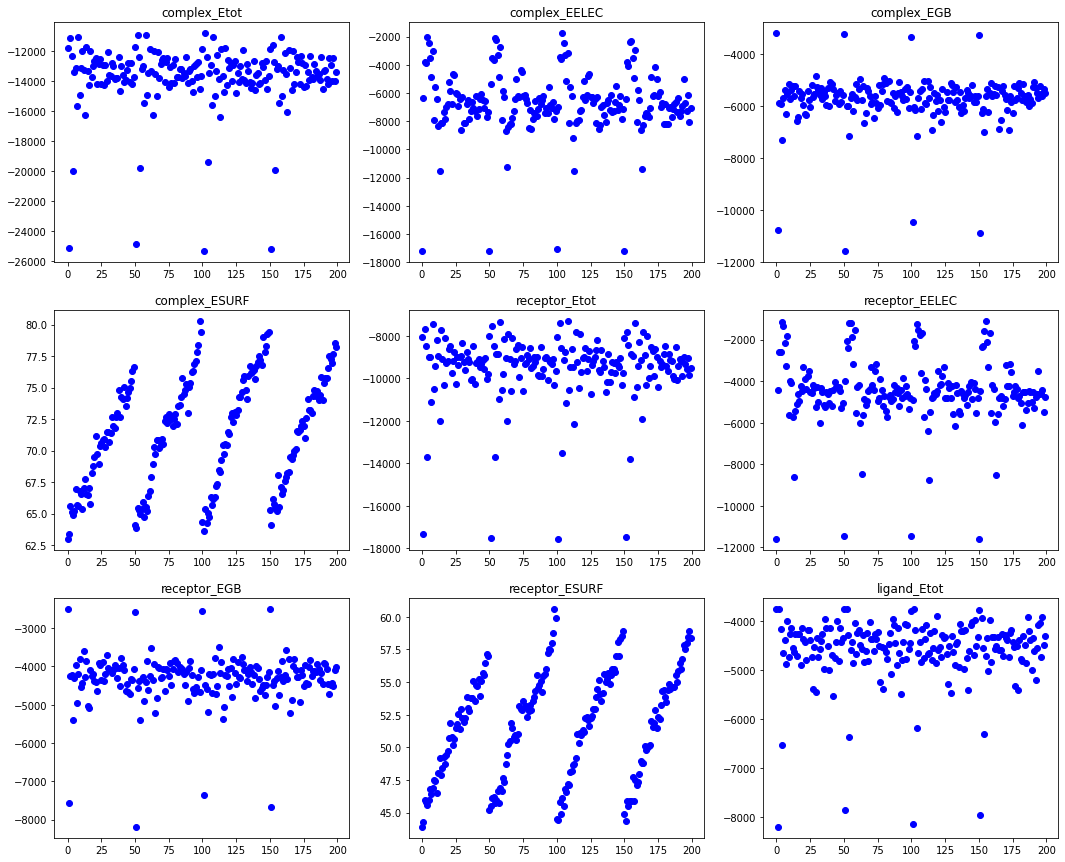

In [25]:
allkeys = list(gbnsr6[0].keys())
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].plot([x[allkeys[n]] for x in gbnsr6], 'bo')
        axs[i, j].set_title(allkeys[n])
        n += 1

In [7]:
fig, axs = plt.subplots(3, 4, figsize=(12, 30))
allkeys=list(gbnsr6_clean[0].keys())
n = 0
for i in range(3):
    for j in range(4):
        axs[i, j].plot([x[allkeys[n]] for x in gbnsr6_clean], 'b^')
        axs[i, j].set_title(allkeys[n])
        n += 1
plt.plot()

[]

In [7]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmpbsa.pkl', 'rb')     
mmpbsa = pickle.load(dbfile)
dbfile.close()

In [8]:
gbnsr6_acc = []
for i in range(len(gbnsr6)):
    new_dict = {}
    for kp in gbnsr6[0].keys():
        k = kp
        k = k.replace('EELEC', 'EEL')
        k = k.replace('complex', 'Complex').replace('receptor', 'Receptor').replace('ligand', 'Ligand')
        new_dict[k] = gbnsr6[i][kp]
    gbnsr6_acc.append(new_dict)

In [9]:
allkeys = list(mmpbsa[0].keys())

KeyError: 'EEL'

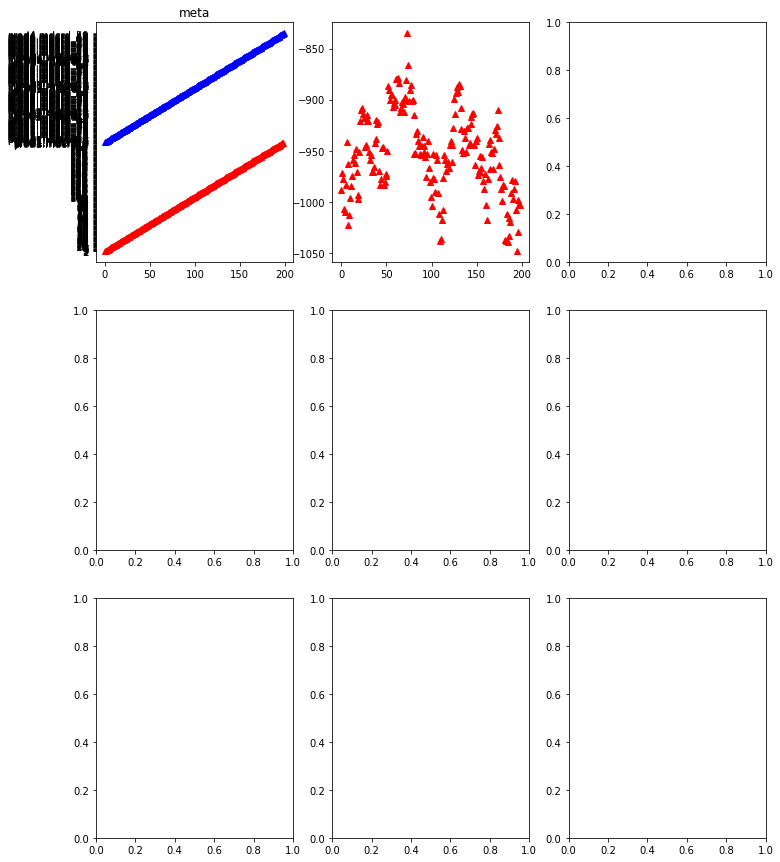

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(12, 15))
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].plot([x[allkeys[n]] for x in mmpbsa], 'r^')
        axs[i, j].plot([x[allkeys[n]] for x in gbnsr6_acc], 'b^')
        axs[i, j].set_title(allkeys[n])
        n += 1

IndexError: list index out of range

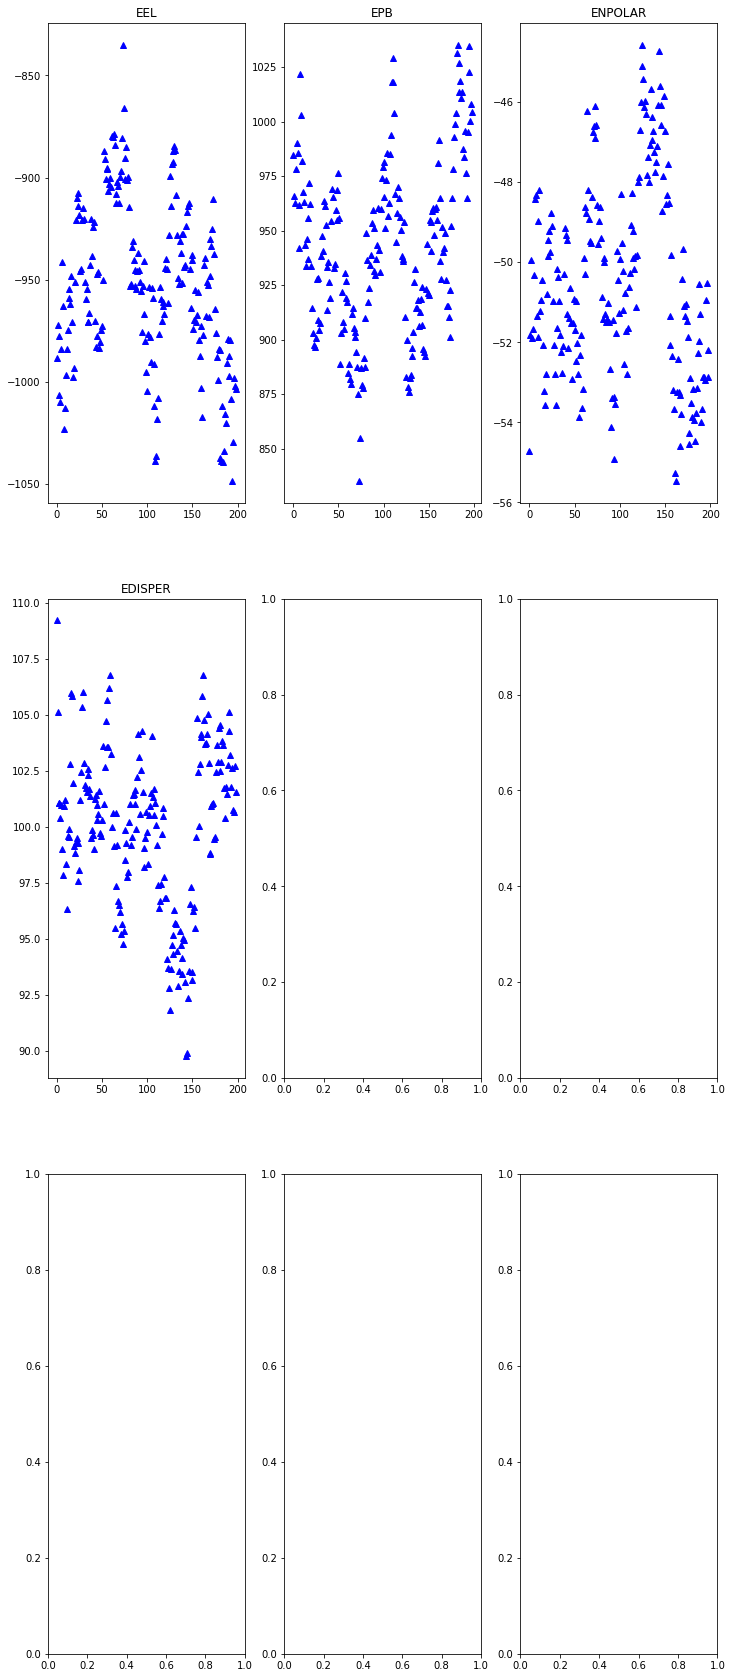

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(12, 30))
allkeys=list(mmpbsa[0].keys())
allkeys.remove('meta')
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].plot([x[allkeys[n]] for x in mmpbsa], 'b^')
        axs[i, j].set_title(allkeys[n])
        n += 1
plt.plot()

In [14]:
!pip install octa_dataset

ERROR: Could not find a version that satisfies the requirement octa_dataset (from versions: none)
ERROR: No matching distribution found for octa_dataset


In [8]:
counter_con = 0
for k in allkeys:
    for i in range(len(mmpbsa) - 1):
        diff_mm = mmpbsa[i + 1][k] - mmpbsa[i][k]
        diff_gb = gbnsr6_acc[i + 1][k] - gbnsr6_acc[i][k]
        if diff_mm/np.abs(diff_mm) != diff_gb/np.abs(diff_gb):
            counter_con += 1
            print('Methods have contradiction between frames %d and %d in %s'%(i, i + 1, k))

Methods have contradiction between frames 0 and 1 in Complex_EEL
Methods have contradiction between frames 1 and 2 in Complex_EEL
Methods have contradiction between frames 2 and 3 in Complex_EEL
Methods have contradiction between frames 3 and 4 in Complex_EEL
Methods have contradiction between frames 4 and 5 in Complex_EEL
Methods have contradiction between frames 6 and 7 in Complex_EEL
Methods have contradiction between frames 8 and 9 in Complex_EEL
Methods have contradiction between frames 9 and 10 in Complex_EEL
Methods have contradiction between frames 10 and 11 in Complex_EEL
Methods have contradiction between frames 11 and 12 in Complex_EEL
Methods have contradiction between frames 12 and 13 in Complex_EEL
Methods have contradiction between frames 14 and 15 in Complex_EEL
Methods have contradiction between frames 0 and 1 in Complex_EGB
Methods have contradiction between frames 2 and 3 in Complex_EGB
Methods have contradiction between frames 3 and 4 in Complex_EGB
Methods have con

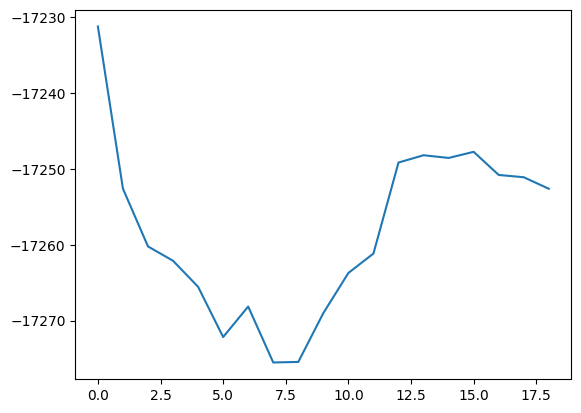

In [9]:
plt.plot([x['Complex_EEL'] for x in mmpbsa])